# Author : Sandaru Malshan
# Peer Reviewer :[]
# Date of peer Review:[]

In [170]:
# installing the data manipulations library
!pip install pandas

## Import some Required Libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings("ignore")

print("Import Required Libraries")

Import Required Libraries


## Load the Dataset

In [172]:
print("===========================================================")
print("Load the Cleaned Classification Dataset (from Notebook 1)")
print("===========================================================")
data_frame = pd.read_csv("/content/classification_dataset.csv")

data_frame.info()

Load the Cleaned Classification Dataset (from Notebook 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3723 non-null   float64
 1   Sex                     3723 non-null   int64  
 2   T_Stage                 3723 non-null   int64  
 3   N_Stage                 3723 non-null   int64  
 4   6th_Stage               3723 non-null   int64  
 5   Differentiated          3723 non-null   int64  
 6   Grade                   3723 non-null   int64  
 7   A_Stage                 3723 non-null   int64  
 8   Tumor_Size              3723 non-null   float64
 9   Estrogen_Status         3723 non-null   int64  
 10  Progesterone_Status     3723 non-null   int64  
 11  Regional_Node_Examined  3723 non-null   float64
 12  Reginol_Node_Positive   3723 non-null   int64  
 13  Mortality_Status        3723 non-nu

##Selecting Feature

In [173]:
x = data_frame.drop("Mortality_Status", axis=1)
y = data_frame["Mortality_Status"]

print("==== x data ====")
print(x.head())
print("\n==== y data ====\n")
print(y.head())

==== x data ====
    Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0  68.0    1        0        0          0               1      3        1   
1  50.0    1        1        1          2               0      2        1   
2  58.0    1        2        2          4               0      2        1   
3  58.0    1        0        0          0               1      3        1   
4  47.0    1        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0         4.0                1                    1                    24.0   
1        35.0                1                    1                    14.0   
2        63.0                1                    1                    14.0   
3        18.0                1                    1                     2.0   
4        41.0                1                    1                     3.0   

   Reginol_Node_Positive  
0                 

### Data Standardization

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)
print(x[:5])


[[ 1.55833682  0.0697015  -0.99454911 -0.60124694 -0.99735586  0.30183191
   1.34732551  0.13943243 -1.52264696  0.25838378  0.45174665  1.38134667
  -0.61385628]
 [-0.45408073  0.0697015   0.41923719  0.89603892  0.63122128 -0.67616653
  -0.22364     0.13943243  0.54336902  0.25838378  0.45174665  0.02183688
   0.24450501]
 [ 0.44032707  0.0697015   1.8330235   2.39332477  2.25979841 -0.67616653
  -0.22364     0.13943243  2.40944797  0.25838378  0.45174665  0.02183688
   0.67368566]
 [ 0.44032707  0.0697015  -0.99454911 -0.60124694 -0.99735586  0.30183191
   1.34732551  0.13943243 -0.58960748  0.25838378  0.45174665 -1.60957488
  -0.61385628]
 [-0.78948365  0.0697015   0.41923719 -0.60124694 -0.18306729  0.30183191
   1.34732551  0.13943243  0.94324308  0.25838378  0.45174665 -1.4736239
  -0.61385628]]


### Divide data set training and testing

In [175]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Whole Data shape', data_frame.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (3723, 14)
X_train shape (2978, 13)
X_test shape (745, 13)


### PCA (Dimensionality Reduction)

In [176]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.27378065 0.12481924 0.11447063 0.09490519 0.07873551]


### Model Evaluation Function

In [177]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve)
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test,plot_roc=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\n{name} Evaluation:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    if auc: print(f"ROC AUC  : {auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Save results
    results.append((name, acc, prec, rec, f1, auc))

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=name)

print("Model Evaluation Function")

Model Evaluation Function


# Train and Evaluate Classifiers

### Logistic Regression


Logistic Regression Evaluation:
Accuracy : 0.8725
Precision: 0.5714
Recall   : 0.0825
F1 Score : 0.1441
ROC AUC  : 0.7172
Confusion Matrix:
 [[642   6]
 [ 89   8]]


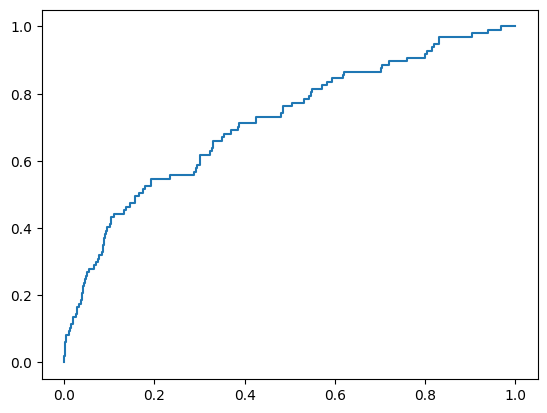

In [178]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
evaluate_model("Logistic Regression", lr, X_train_pca, y_train, X_test_pca, y_test)

In [179]:
pread =lr.predict(X_test_pca)
print(pread)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Naive Bayes


Naive Bayes Evaluation:
Accuracy : 0.8497
Precision: 0.4000
Recall   : 0.3093
F1 Score : 0.3488
ROC AUC  : 0.7091
Confusion Matrix:
 [[603  45]
 [ 67  30]]


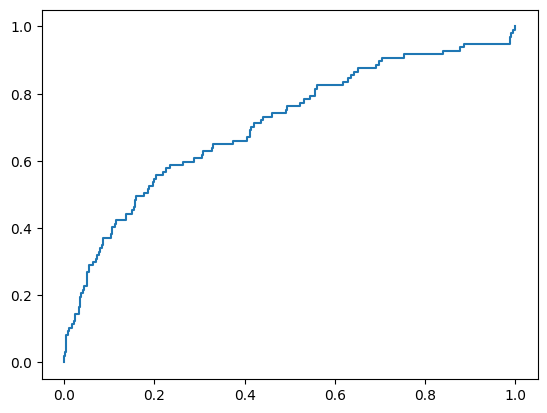

In [180]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
evaluate_model("Naive Bayes", nb, X_train_pca, y_train, X_test_pca, y_test)

In [181]:
pread =nb.predict(X_test_pca)
print(pread)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

### K-Nearest Neighbors


K-Nearest Neighbors Evaluation:
Accuracy : 0.8577
Precision: 0.3548
Recall   : 0.1134
F1 Score : 0.1719
ROC AUC  : 0.6541
Confusion Matrix:
 [[628  20]
 [ 86  11]]


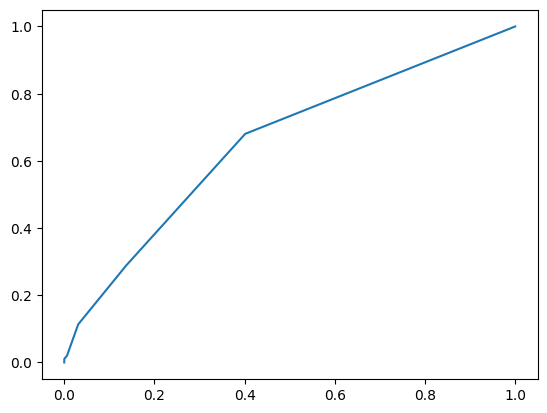

In [182]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
evaluate_model("K-Nearest Neighbors", knn, X_train_pca, y_train, X_test_pca, y_test)


In [183]:
pread =knn.predict(X_test_pca)
print(pread)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Show ROC Curves


Plotting ROC Curves...

Logistic Regression Evaluation:
Accuracy : 0.8725
Precision: 0.5714
Recall   : 0.0825
F1 Score : 0.1441
ROC AUC  : 0.7172
Confusion Matrix:
 [[642   6]
 [ 89   8]]

Naive Bayes Evaluation:
Accuracy : 0.8497
Precision: 0.4000
Recall   : 0.3093
F1 Score : 0.3488
ROC AUC  : 0.7091
Confusion Matrix:
 [[603  45]
 [ 67  30]]

KNN Evaluation:
Accuracy : 0.8577
Precision: 0.3548
Recall   : 0.1134
F1 Score : 0.1719
ROC AUC  : 0.6541
Confusion Matrix:
 [[628  20]
 [ 86  11]]


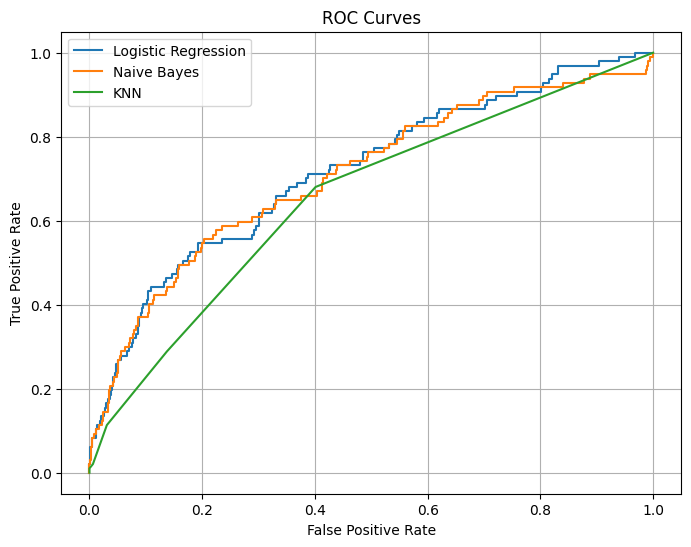

In [184]:
print("\nPlotting ROC Curves...")
plt.figure(figsize=(8, 6))
evaluate_model("Logistic Regression", lr, X_train_pca, y_train, X_test_pca, y_test, plot_roc=True)
evaluate_model("Naive Bayes", nb, X_train_pca, y_train, X_test_pca, y_test, plot_roc=True)
evaluate_model("KNN", knn, X_train_pca, y_train, X_test_pca, y_test, plot_roc=True)


plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### Hyperparameter Tuning for KNN

Best K for KNN: {'n_neighbors': 20}

Tuned KNN Evaluation:
Accuracy : 0.8738
Precision: 0.6667
Recall   : 0.0619
F1 Score : 0.1132
ROC AUC  : 0.7088
Confusion Matrix:
 [[645   3]
 [ 91   6]]


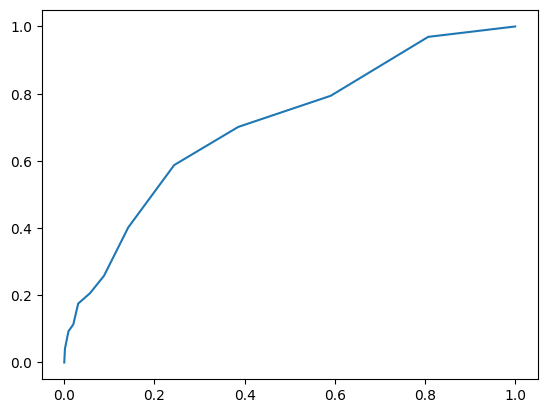

In [185]:
param_grid = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_pca, y_train)

print("Best K for KNN:", grid_knn.best_params_)
evaluate_model("Tuned KNN", grid_knn.best_estimator_, X_train_pca, y_train, X_test_pca, y_test)

In [186]:
pread = grid_knn.predict(X_test_pca)
print(pread)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Final Summary

In [187]:
print("\nSUMMARY")
print("- Applied StandardScaler and PCA (5 components).")
print("- Trained 3 classifiers: Logistic Regression, Naive Bayes, KNN.")
print("- Evaluated with Accuracy, Precision, Recall, F1, Confusion Matrix, ROC AUC.")
print("- Tuned KNN using GridSearchCV.")


SUMMARY
- Applied StandardScaler and PCA (5 components).
- Trained 3 classifiers: Logistic Regression, Naive Bayes, KNN.
- Evaluated with Accuracy, Precision, Recall, F1, Confusion Matrix, ROC AUC.
- Tuned KNN using GridSearchCV.
